In [1]:
#imports

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import cv2
from tqdm import tqdm


## A first Approach with Linear Regression ##

In [131]:
df = pd.read_csv(r"C:\Users\DE136963\Downloads\total_df (1).csv")


# make columns numerical
#non_numeric_cols = ['Area_Types']
#df = pd.get_dummies(df, columns=non_numeric_cols)

df_no_target = df.drop(['Land_Value', 'Unnamed: 0'], axis = 1)
print(type(df_no_target))
#df_no_target.to_csv("Total_No_Land_Values.csv")


#Drop constant columns
#--------------------------------------------
# Calculate the variance of each column
variances = df.var()

# Define the variance threshold (e.g., 0.01)
var_threshold = 0.05

# Find the constant or almost constant columns
const_cols = variances[variances <= var_threshold].index

# Remove the constant or almost constant columns from the dataframe
df = df.drop(const_cols, axis=1)


#correlation analysis
#--------------------------------------------

correlations = df.corr()['Land_Value'].drop('Land_Value')

selected_cols = correlations[correlations > 0.5].index.tolist()

X = df[selected_cols]
y = df['Land_Value']

print(X.columns)
print(X.shape)

#Model: Linear Regression
#--------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = r2_score(y_test, y_pred)

print(score)








<class 'pandas.core.frame.DataFrame'>
Index(['we_private_individuals', 'r_1', 'gs_other_building_with_living_space',
       'e_community_of_apartment_owners', 'famk_reg_partner_wout_child',
       'hhleb_registered_partner', 'fam_civil_partner', 'geb_eu27',
       'geb_other_world', 'sg_eu27', 'sg_other_world', 'sh_netherlands',
       'sh_austria', 'sh_other', 'sz_mult_foreign_only'],
      dtype='object')
(363, 15)
0.4131848796180142


C:\Users\DE136963\AppData\Local\Temp\ipykernel_13704\1193785615.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = df.var()


## Model Selection and Evaluation ##
The Following Code provides a Model evaluation, comparing the following algorithm with respect to the prepared dataset:
    
    1. Linear Regression
    
    2. Ridge Regression
    
    3. Lasso Regression
    
    4. Elastic Net Regression
    
    5. Decision Tree Regression
    
    6. Random Forest Regression
    
    7. Gradient Boosting Regression
    
    8. Multi-layer Perceptron Regression
    
    9. K-Nearest-Neighbor Regression
    
    10. Support Vector Regression
    
Wir haben alle 10 Modelle auf 50 verschiedenen Splits getestet und uns das empirische Mittel der Scores angeschaut (Plot)


In [3]:
df = pd.read_csv(r"C:\Users\DE136963\Downloads\total_df (1).csv")

# make columns numerical
non_numeric_cols = ['Area_Types']
df = pd.get_dummies(df, columns=non_numeric_cols)

df = df.drop(['City_Name', 'Unnamed: 0', 'Neighborhood_FID'], axis = 1)

df = df.dropna()

X = df.drop('Land_Value', axis = 1)
y = df['Land_Value']

print(y)
# Create a PCA object
pca = PCA(n_components=10)

# Fit and transform the data
X = pca.fit_transform(X)
X = pd.DataFrame(X)

y.to_csv("y_Data.csv", index = False)

print(type(X))

0      9238.7
1      3658.7
2      2452.0
3      7877.8
4      1726.8
        ...  
358     229.2
359      88.0
360     138.3
361      35.0
362     435.5
Name: Land_Value, Length: 298, dtype: float64
<class 'pandas.core.frame.DataFrame'>


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load your data and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
def lr(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    return r2_score(y_test, y_pred_lr)

In [114]:
def ridge(X_train, X_test, y_train, y_test):
    ridge = Ridge(alpha=0.5)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    return r2_score(y_test, y_pred_ridge)

In [115]:
def lasso(X_train, X_test, y_train, y_test):
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    return r2_score(y_test, y_pred_lasso)

In [116]:
def en(X_train, X_test, y_train, y_test):
    en = ElasticNet(alpha=0.1, l1_ratio=0.5)
    en.fit(X_train, y_train)
    y_pred_en = en.predict(X_test)
    return r2_score(y_test, y_pred_en)

In [117]:
def dt(X_train, X_test, y_train, y_test):
    dt = DecisionTreeRegressor(max_depth=5)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    return r2_score(y_test, y_pred_dt)

In [118]:
def rfr(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=100, max_depth=5)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    return r2_score(y_test, y_pred_rf)

In [119]:
def gbdt(X_train, X_test, y_train, y_test):
    gb = GradientBoostingRegressor(n_estimators=50, max_depth=5)
    gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)
    return r2_score(y_test, y_pred_gb)



In [120]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

def mlp(X_train, X_test, y_train, y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create an MLP Regression model with a single hidden layer of 100 neurons
    mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    # Predict the target variable for the testing data
    y_pred = mlp.predict(X_test)

    # Evaluate the performance of the model using R-squared and Mean Squared Error metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    return r2

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

def knn(X_train, X_test, y_train, y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create a KNN Regression model with k=5
    knn = KNeighborsRegressor(n_neighbors=5)

    # Train the model on the training data
    knn.fit(X_train, y_train)

    # Predict the target variable for the testing data
    y_pred = knn.predict(X_test)

    # Evaluate the performance of the model using R-squared and Mean Squared Error metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    return r2

In [122]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def svr(X_train, X_test, y_train, y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create an SVR model with a linear kernel
    svr = SVR(kernel='linear')

    # Train the model on the training data
    svr.fit(X_train, y_train)

    # Predict the target variable for the testing data
    y_pred = svr.predict(X_test)

    # Evaluate the performance of the model using R-squared and Mean Squared Error metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    return r2

In [123]:
scores = np.zeros(10)

for i in tqdm(range(1,50)):
    scores[0] += lr(X_train, X_test, y_train, y_test)
    scores[1] += ridge(X_train, X_test, y_train, y_test)
    scores[2] += lasso(X_train, X_test, y_train, y_test)
    scores[3] += en(X_train, X_test, y_train, y_test)
    scores[4] += dtr(X_train, X_test, y_train, y_test)
    scores[5] += rfr(X_train, X_test, y_train, y_test)
    scores[6] += gbdt(X_train, X_test, y_train, y_test)
    scores[7] += mlp(X_train, X_test, y_train, y_test)
    scores[8] += knn(X_train, X_test, y_train, y_test)
    scores[9] += svr(X_train, X_test, y_train, y_test)
    
scores = scores/49

  0%|                                                                                           | 0/49 [00:00<?, ?it/s]C:\Users\DE136963\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
  2%|█▋                                                                                 | 1/49 [00:01<00:50,  1.05s/it]C:\Users\DE136963\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
  4%|███▍                                                                               | 2/49 [00:02<00:52,  1.12s/it]C:\Users\DE136963\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) rea

 94%|████████████████████████████████████████████████████████████████████████████▉     | 46/49 [00:49<00:03,  1.13s/it]C:\Users\DE136963\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 96%|██████████████████████████████████████████████████████████████████████████████▋   | 47/49 [00:50<00:02,  1.12s/it]C:\Users\DE136963\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|████████████████████████████████████████████████████████████████████████████████▎ | 48/49 [00:51<00:01,  1.10s/it]C:\Users\DE136963\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) rea

[ 0.27870021  0.27870021  0.27870021  0.27870021 -0.19154035  0.59035331
  0.56846442  0.32997242  0.55970784 -0.01036446]


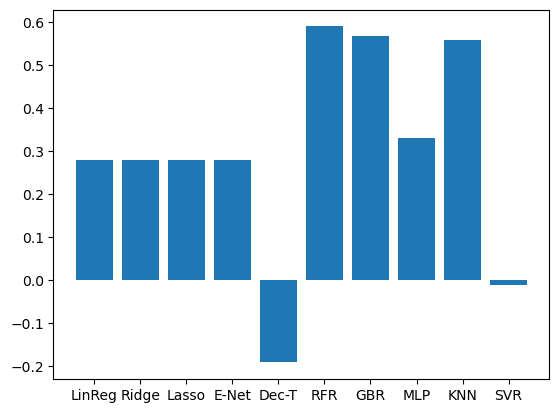

In [124]:
methods = ["LinReg", "Ridge", "Lasso", "E-Net", "Dec-T", "RFR", "GBR", "MLP", "KNN", "SVR"]
plt.bar(methods, scores)

print(scores)

In [4]:

def model_fit(X_train, y_train):
    rf = RandomForestRegressor(n_estimators=100, max_depth=5)
    rf.fit(X_train, y_train)
    return rf

def model_predict(rf, X_test):
    y_pred = rf.predict(X_test)
    return y_pred





     Land_Value
0        9238.7
1        3658.7
2        2452.0
3        7877.8
4        1726.8
..          ...
293       229.2
294        88.0
295       138.3
296        35.0
297       435.5

[298 rows x 1 columns]
(298,)


C:\Users\DE136963\AppData\Local\Temp\ipykernel_10928\3252219314.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
